In [77]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [78]:
#from pyspark.sql import SparkSession
#spark = SparkSession.builder.master('[*]').appName("CSV_related").getOrCreate()
#sc = spark.sparkContext
#path = "examples/src/main/resources/people.csv"

#df = spark.read.csv(path)
#df.show()
df = spark.read.option("delimiter", ",").option("header", True).csv("Airline_Dataset.csv")
#df = spark.read.option("header",True).csv("work/Airline_Dataset.csv")
df.printSchema()

root
 |-- Passenger ID: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Airport Name: string (nullable = true)
 |-- Airport Country Code: string (nullable = true)
 |-- Country Name: string (nullable = true)
 |-- Airport Continent: string (nullable = true)
 |-- Continents: string (nullable = true)
 |-- Departure Date: string (nullable = true)
 |-- Arrival Airport: string (nullable = true)
 |-- Pilot Name: string (nullable = true)
 |-- Flight Status: string (nullable = true)



In [79]:
df.show()

+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+--------------+---------------+-------------------+-------------+
|Passenger ID|First Name|     Last Name|Gender|Age|         Nationality|        Airport Name|Airport Country Code|        Country Name|Airport Continent|   Continents|Departure Date|Arrival Airport|         Pilot Name|Flight Status|
+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+--------------+---------------+-------------------+-------------+
|       10856|    Edithe|        Leggis|Female| 62|               Japan|    Coldfoot Airport|                  US|       United States|              NAM|North America|     6/28/2022|            CXF|      Edithe Leggis|      On Time|
|       43872|    Elwood|          Catt|  Male| 62|           Nicara

In [80]:
df.drop("Passenger ID","First Name","Last Name") \
    .printSchema()
#df.drop(['Passenger ID', 'First Name','Last Name'])

root
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Airport Name: string (nullable = true)
 |-- Airport Country Code: string (nullable = true)
 |-- Country Name: string (nullable = true)
 |-- Airport Continent: string (nullable = true)
 |-- Continents: string (nullable = true)
 |-- Departure Date: string (nullable = true)
 |-- Arrival Airport: string (nullable = true)
 |-- Pilot Name: string (nullable = true)
 |-- Flight Status: string (nullable = true)



In [81]:
gender_count = df.groupBy('Gender').count().orderBy('count')


In [82]:
gender_count.show()

+------+-----+
|Gender|count|
+------+-----+
|Female|49021|
|  Male|49598|
+------+-----+



In [83]:
gender = df.select('Gender').distinct()
gender.show()

+------+
|Gender|
+------+
|Female|
|  Male|
+------+



In [84]:
df.select('Nationality').distinct().show(truncate=False)

+---------------------------+
|Nationality                |
+---------------------------+
|Chad                       |
|Russia                     |
|Paraguay                   |
|Anguilla                   |
|Macao                      |
|Yemen                      |
|U.S. Virgin Islands        |
|Senegal                    |
|Sweden                     |
|Tokelau                    |
|Kiribati                   |
|French Southern Territories|
|Svalbard and Jan Mayen     |
|Guyana                     |
|Philippines                |
|Eritrea                    |
|Jersey                     |
|Norfolk Island             |
|Djibouti                   |
|Tonga                      |
+---------------------------+
only showing top 20 rows



In [85]:
nationality= df.select('Nationality').distinct()
nationality.show(10)

+-------------------+
|        Nationality|
+-------------------+
|               Chad|
|             Russia|
|           Paraguay|
|           Anguilla|
|              Macao|
|              Yemen|
|U.S. Virgin Islands|
|            Senegal|
|             Sweden|
|            Tokelau|
+-------------------+
only showing top 10 rows



In [86]:
nationality_count = df.groupBy('Nationality').count() #.orderBy('count')
nationality_count.sort("count", ascending=False).show(10)
#nationality_count.sort(nationality_count.count.asc()).show()


######nationality_count.sort(nationality_count.('count').asc()).show(300)
#nationality_count.sort(nationality_count('count').asc()).show(300)

+-------------+-----+
|  Nationality|count|
+-------------+-----+
|        China|18317|
|    Indonesia|10559|
|       Russia| 5693|
|  Philippines| 5239|
|       Brazil| 3791|
|     Portugal| 3299|
|       Poland| 3245|
|       France| 2907|
|       Sweden| 2397|
|United States| 2105|
+-------------+-----+
only showing top 10 rows



In [87]:
nationality_count.select('Nationality').show()

+--------------------+
|         Nationality|
+--------------------+
|                Chad|
|              Russia|
|            Paraguay|
|            Anguilla|
|               Macao|
|               Yemen|
| U.S. Virgin Islands|
|             Senegal|
|              Sweden|
|             Tokelau|
|            Kiribati|
|French Southern T...|
|Svalbard and Jan ...|
|              Guyana|
|         Philippines|
|             Eritrea|
|              Jersey|
|      Norfolk Island|
|            Djibouti|
|               Tonga|
+--------------------+
only showing top 20 rows



In [88]:
pandasdf = nationality_count.toPandas()
pandasdf.head()


,Nationality,count
0,Chad,87
1,Russia,5693
2,Paraguay,137
3,Anguilla,4
4,Macao,2


In [89]:
top_10_countries=pandasdf.nlargest(10,'count')
top_10_countries

,Nationality,count
69,China,18317
145,Indonesia,10559
1,Russia,5693
14,Philippines,5239
187,Brazil,3791
204,Portugal,3299
203,Poland,3245
38,France,2907
8,Sweden,2397
70,United States,2105


<Axes: xlabel='Nationality'>

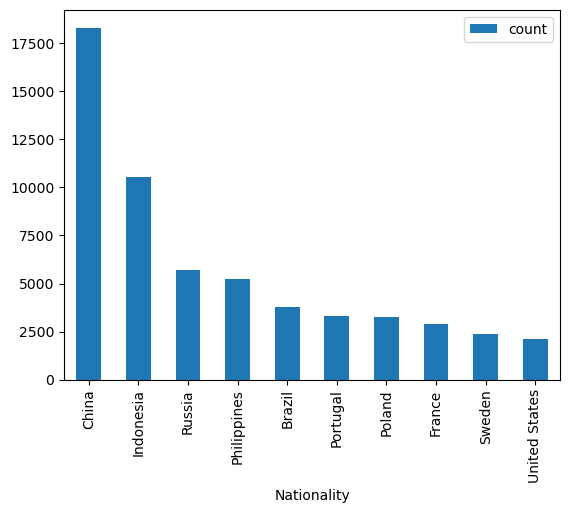

In [90]:
top_10_countries.plot.bar(x='Nationality', y='count') 

<Axes: xlabel='Age', ylabel='Density'>

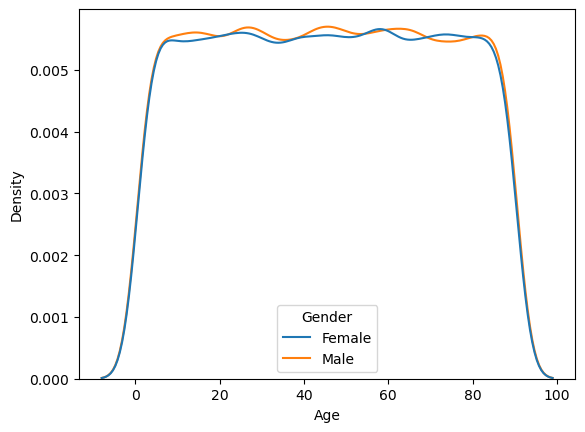

In [91]:
from seaborn import kdeplot
data = df.toPandas()
data["Age"] = data["Age"].astype(int)
kdeplot(data=data, x='Age', hue='Gender')

In [92]:
df.show()

+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+--------------+---------------+-------------------+-------------+
|Passenger ID|First Name|     Last Name|Gender|Age|         Nationality|        Airport Name|Airport Country Code|        Country Name|Airport Continent|   Continents|Departure Date|Arrival Airport|         Pilot Name|Flight Status|
+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+--------------+---------------+-------------------+-------------+
|       10856|    Edithe|        Leggis|Female| 62|               Japan|    Coldfoot Airport|                  US|       United States|              NAM|North America|     6/28/2022|            CXF|      Edithe Leggis|      On Time|
|       43872|    Elwood|          Catt|  Male| 62|           Nicara

In [93]:
df.select('Airport Name').distinct().show(truncate=False)

+----------------------------------------+
|Airport Name                            |
+----------------------------------------+
|Guilin Liangjiang International Airport |
|Playa Baracoa Airport                   |
|Clinton Creek Airport                   |
|Port Gentil Airport                     |
|Big Lake Airport                        |
|Sanikiluaq Airport                      |
|Yichun Mingyueshan Airport              |
|San Pedro Airport                       |
|Siassi Airport                          |
|Capitán Av. Selin Zeitun Lopez Airport  |
|Boundary Bay Airport                    |
|Loncopue Airport                        |
|Five Mile Airport                       |
|Vohimarina Airport                      |
|Miller Field                            |
|China Bay Airport                       |
|Fort Worth Meacham International Airport|
|Mkuze Airport                           |
|São Gabriel Airport                     |
|Adelaide International Airport          |
+----------

In [94]:
flightstatus_count = df.groupBy('Flight Status').count() #.orderBy('count')
flightstatus_count.sort("count", ascending=False).show(10)

+-------------+-----+
|Flight Status|count|
+-------------+-----+
|    Cancelled|32942|
|      On Time|32846|
|      Delayed|32831|
+-------------+-----+



In [95]:
N_America=df.filter(df.Continents =='North America') #.count()
N_America.show(truncate = True)


+------------+----------+----------+------+---+-------------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-----------------+-------------+
|Passenger ID|First Name| Last Name|Gender|Age|  Nationality|        Airport Name|Airport Country Code| Country Name|Airport Continent|   Continents|Departure Date|Arrival Airport|       Pilot Name|Flight Status|
+------------+----------+----------+------+---+-------------+--------------------+--------------------+-------------+-----------------+-------------+--------------+---------------+-----------------+-------------+
|       10856|    Edithe|    Leggis|Female| 62|        Japan|    Coldfoot Airport|                  US|United States|              NAM|North America|     6/28/2022|            CXF|    Edithe Leggis|      On Time|
|       43872|    Elwood|      Catt|  Male| 62|    Nicaragua|   Kugluktuk Airport|                  CA|       Canada|              NAM|North America

In [96]:
N_America_count = N_America.groupBy('Flight Status').count() #.orderBy('count')
N_America_count.sort("count", ascending=False).show(10)

+-------------+-----+
|Flight Status|count|
+-------------+-----+
|      Delayed|10696|
|    Cancelled|10693|
|      On Time|10644|
+-------------+-----+



In [97]:
asia=df.filter(df.Continents =='Asia') #.count()
asia.show(truncate = True)

+------------+----------+----------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+----------+--------------+---------------+------------------+-------------+
|Passenger ID|First Name| Last Name|Gender|Age|         Nationality|        Airport Name|Airport Country Code|        Country Name|Airport Continent|Continents|Departure Date|Arrival Airport|        Pilot Name|Flight Status|
+------------+----------+----------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+----------+--------------+---------------+------------------+-------------+
|       19631|     Kalie|    Scoble|Female| 47|              Sweden|     Loralai Airport|                  PK|            Pakistan|               AS|      Asia|     3/19/2022|            LRG|      Kalie Scoble|      Delayed|
|       39783|     Alvin|    Wenzel|  Male| 12|              Greece|       Enshi Airport|           

In [98]:
asia_count = asia.groupBy('Flight Status').count() #.orderBy('count')
asia_count.sort("count", ascending=False).show(10)

+-------------+-----+
|Flight Status|count|
+-------------+-----+
|      On Time| 6242|
|    Cancelled| 6235|
|      Delayed| 6160|
+-------------+-----+



In [99]:
oceania=df.filter(df.Continents =='Oceania') #.count()
oceania.show(truncate = True)

+------------+----------+-------------+------+---+--------------+--------------------+--------------------+----------------+-----------------+----------+--------------+---------------+--------------------+-------------+
|Passenger ID|First Name|    Last Name|Gender|Age|   Nationality|        Airport Name|Airport Country Code|    Country Name|Airport Continent|Continents|Departure Date|Arrival Airport|          Pilot Name|Flight Status|
+------------+----------+-------------+------+---+--------------+--------------------+--------------------+----------------+-----------------+----------+--------------+---------------+--------------------+-------------+
|       58109|  Catriona|     Beaument|Female| 77|        Russia|       Cudal Airport|                  AU|       Australia|               OC|   Oceania|     3/24/2022|            CUG|   Catriona Beaument|      Delayed|
|       30642|  Magdalen|      Claiden|Female| 14|         China|Faleolo Internati...|                  WS|           Sa

In [100]:
oceania_count = oceania.groupBy('Flight Status').count() #.orderBy('count')
oceania_count.sort("count", ascending=False).show(10)

+-------------+-----+
|Flight Status|count|
+-------------+-----+
|      Delayed| 4634|
|    Cancelled| 4619|
|      On Time| 4613|
+-------------+-----+



In [101]:
df.dtypes

[('Passenger ID', 'string'),
 ('First Name', 'string'),
 ('Last Name', 'string'),
 ('Gender', 'string'),
 ('Age', 'string'),
 ('Nationality', 'string'),
 ('Airport Name', 'string'),
 ('Airport Country Code', 'string'),
 ('Country Name', 'string'),
 ('Airport Continent', 'string'),
 ('Continents', 'string'),
 ('Departure Date', 'string'),
 ('Arrival Airport', 'string'),
 ('Pilot Name', 'string'),
 ('Flight Status', 'string')]

In [102]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
#df.withColumn("date", to_date(col("InvoiceDate"), "MM/dd/yyyy")).show()

from pyspark.sql.functions import to_date, col, to_timestamp, dayofweek,dayofmonth, month
df1 = df.withColumn("Departure Date", to_timestamp(col("Departure Date"), "MM/dd/yyyy"))
df1.printSchema()

root
 |-- Passenger ID: string (nullable = true)
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Airport Name: string (nullable = true)
 |-- Airport Country Code: string (nullable = true)
 |-- Country Name: string (nullable = true)
 |-- Airport Continent: string (nullable = true)
 |-- Continents: string (nullable = true)
 |-- Departure Date: timestamp (nullable = true)
 |-- Arrival Airport: string (nullable = true)
 |-- Pilot Name: string (nullable = true)
 |-- Flight Status: string (nullable = true)



In [103]:
df1.columns

['Passenger ID',
 'First Name',
 'Last Name',
 'Gender',
 'Age',
 'Nationality',
 'Airport Name',
 'Airport Country Code',
 'Country Name',
 'Airport Continent',
 'Continents',
 'Departure Date',
 'Arrival Airport',
 'Pilot Name',
 'Flight Status']

In [104]:
#from pyspark.sql.functions import to_date, col, to_timestamp, to_date
#df1 = df.withColumn("Departure Date", to_date(col("Departure Date"), "MM-dd-yyyy"))
#df1.printSchema()
#df1 = df.select(to_date("Departure Date", 'yyyy-MM-dd').alias('dt'))
#print df1
df1.show()

+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+-------------------+---------------+-------------------+-------------+
|Passenger ID|First Name|     Last Name|Gender|Age|         Nationality|        Airport Name|Airport Country Code|        Country Name|Airport Continent|   Continents|     Departure Date|Arrival Airport|         Pilot Name|Flight Status|
+------------+----------+--------------+------+---+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+-------------------+---------------+-------------------+-------------+
|       10856|    Edithe|        Leggis|Female| 62|               Japan|    Coldfoot Airport|                  US|       United States|              NAM|North America|2022-06-28 00:00:00|            CXF|      Edithe Leggis|      On Time|
|       43872|    Elwood|          Catt|  Male| 

In [105]:
df1.select("Departure Date").show()

+-------------------+
|     Departure Date|
+-------------------+
|2022-06-28 00:00:00|
|2022-12-26 00:00:00|
|2022-01-18 00:00:00|
|2022-09-16 00:00:00|
|2022-02-25 00:00:00|
|2022-06-10 00:00:00|
|2022-10-30 00:00:00|
|2022-04-07 00:00:00|
|2022-08-20 00:00:00|
|2022-04-06 00:00:00|
|2022-05-27 00:00:00|
|2022-02-06 00:00:00|
|2022-03-19 00:00:00|
|2022-03-24 00:00:00|
|2022-03-07 00:00:00|
|2022-07-18 00:00:00|
|2022-09-23 00:00:00|
|2022-03-29 00:00:00|
|2022-11-03 00:00:00|
|2022-09-05 00:00:00|
+-------------------+
only showing top 20 rows



In [106]:
#df['Departure Date'] = pd.to_datetime(df['Departure Date'])
#df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
#df['Month'] = df['Departure Date'].dt.month
#df
df2 = df1.withColumn("Day_of_Week", dayofweek(col("Departure Date")))
df2.select("Day_of_Week").show()

+-----------+
|Day_of_Week|
+-----------+
|          3|
|          2|
|          3|
|          6|
|          6|
|          6|
|          1|
|          5|
|          7|
|          4|
|          6|
|          1|
|          7|
|          5|
|          2|
|          2|
|          6|
|          3|
|          5|
|          2|
+-----------+
only showing top 20 rows



In [107]:
df2.columns

['Passenger ID',
 'First Name',
 'Last Name',
 'Gender',
 'Age',
 'Nationality',
 'Airport Name',
 'Airport Country Code',
 'Country Name',
 'Airport Continent',
 'Continents',
 'Departure Date',
 'Arrival Airport',
 'Pilot Name',
 'Flight Status',
 'Day_of_Week']

In [108]:
df3 = df2.withColumn("Month", month(col("Departure Date")))
df3.select("Month").show()

+-----+
|Month|
+-----+
|    6|
|   12|
|    1|
|    9|
|    2|
|    6|
|   10|
|    4|
|    8|
|    4|
|    5|
|    2|
|    3|
|    3|
|    3|
|    7|
|    9|
|    3|
|   11|
|    9|
+-----+
only showing top 20 rows



In [109]:
df3.columns

['Passenger ID',
 'First Name',
 'Last Name',
 'Gender',
 'Age',
 'Nationality',
 'Airport Name',
 'Airport Country Code',
 'Country Name',
 'Airport Continent',
 'Continents',
 'Departure Date',
 'Arrival Airport',
 'Pilot Name',
 'Flight Status',
 'Day_of_Week',
 'Month']

In [110]:
df3.select("Day_of_Week").distinct().show()

+-----------+
|Day_of_Week|
+-----------+
|          1|
|          6|
|          3|
|          5|
|          4|
|          7|
|          2|
+-----------+



In [111]:
df3.dtypes

[('Passenger ID', 'string'),
 ('First Name', 'string'),
 ('Last Name', 'string'),
 ('Gender', 'string'),
 ('Age', 'string'),
 ('Nationality', 'string'),
 ('Airport Name', 'string'),
 ('Airport Country Code', 'string'),
 ('Country Name', 'string'),
 ('Airport Continent', 'string'),
 ('Continents', 'string'),
 ('Departure Date', 'timestamp'),
 ('Arrival Airport', 'string'),
 ('Pilot Name', 'string'),
 ('Flight Status', 'string'),
 ('Day_of_Week', 'int'),
 ('Month', 'int')]

In [112]:
features = ['Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month', 'Flight Status']
X = df3.select(features)
#X = df3.withColumn(features, col(features))
X.show()
#df3[features].copy()

+--------------------+--------------------+-----------------+-----------+-----+-------------+
|        Airport Name|        Country Name|Airport Continent|Day_of_Week|Month|Flight Status|
+--------------------+--------------------+-----------------+-----------+-----+-------------+
|    Coldfoot Airport|       United States|              NAM|          3|    6|      On Time|
|   Kugluktuk Airport|              Canada|              NAM|          2|   12|      On Time|
|Grenoble-Isère Ai...|              France|               EU|          3|    1|      On Time|
|Ottawa / Gatineau...|              Canada|              NAM|          6|    9|      Delayed|
|     Gillespie Field|       United States|              NAM|          6|    2|      On Time|
|Coronel Horácio d...|              Brazil|              SAM|          6|    6|      On Time|
|   Duxford Aerodrome|      United Kingdom|               EU|          1|   10|    Cancelled|
|Maestro Wilson Fo...|              Brazil|              SAM

In [113]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql import functions as F
inputs = ['Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month']
outputs = ['AirportName_label', 'CountryName_label', 'AirportContinent_label', 'Day_of_Week_label', 'Month_label']
indexer = StringIndexer(inputCols=inputs, outputCols=outputs) 
X = indexer.fit(X).transform(X)
X = X.withColumn("Flight Status", F.when(col("Flight Status") == 'Delayed', 1).otherwise(0))
#indexed_df=indexed_df.drop("City").withColumnRenamed("City_label","City")
X.show()

+--------------------+--------------------+-----------------+-----------+-----+-------------+-----------------+-----------------+----------------------+-----------------+-----------+
|        Airport Name|        Country Name|Airport Continent|Day_of_Week|Month|Flight Status|AirportName_label|CountryName_label|AirportContinent_label|Day_of_Week_label|Month_label|
+--------------------+--------------------+-----------------+-----------+-----+-------------+-----------------+-----------------+----------------------+-----------------+-----------+
|    Coldfoot Airport|       United States|              NAM|          3|    6|            0|           3801.0|              0.0|                   0.0|              3.0|        7.0|
|   Kugluktuk Airport|              Canada|              NAM|          2|   12|            0|           6260.0|              2.0|                   0.0|              4.0|       10.0|
|Grenoble-Isère Ai...|              France|               EU|          3|    1|      

In [114]:
cols = ('Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month')
X1 = X.drop(*cols)
X1.show()

+-------------+-----------------+-----------------+----------------------+-----------------+-----------+
|Flight Status|AirportName_label|CountryName_label|AirportContinent_label|Day_of_Week_label|Month_label|
+-------------+-----------------+-----------------+----------------------+-----------------+-----------+
|            0|           3801.0|              0.0|                   0.0|              3.0|        7.0|
|            0|           6260.0|              2.0|                   0.0|              4.0|       10.0|
|            0|            971.0|             10.0|                   3.0|              3.0|        4.0|
|            1|           8065.0|              2.0|                   0.0|              2.0|        6.0|
|            0|           3920.0|              0.0|                   0.0|              2.0|       11.0|
|            0|           3815.0|              3.0|                   5.0|              2.0|        7.0|
|            0|           8390.0|             11.0|    

In [115]:
#scaling features
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
#from pyspark.ml.feature import VectorAssembler
#columns_to_scale = ['AirportName_label', 'CountryName_label', 'AirportContinent_label', 'Day_of_Week_label', 'Month_label']
#assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
#scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
#pipeline = Pipeline(stages=assemblers + scalers)
#scalerModel  = pipeline.fit(X1)
assembler = VectorAssembler(inputCols=['AirportName_label', 'CountryName_label', 'AirportContinent_label', 'Day_of_Week_label', 'Month_label'], 
outputCol="features")
output = assembler.transform(X1)
output.show()

+-------------+-----------------+-----------------+----------------------+-----------------+-----------+--------------------+
|Flight Status|AirportName_label|CountryName_label|AirportContinent_label|Day_of_Week_label|Month_label|            features|
+-------------+-----------------+-----------------+----------------------+-----------------+-----------+--------------------+
|            0|           3801.0|              0.0|                   0.0|              3.0|        7.0|[3801.0,0.0,0.0,3...|
|            0|           6260.0|              2.0|                   0.0|              4.0|       10.0|[6260.0,2.0,0.0,4...|
|            0|            971.0|             10.0|                   3.0|              3.0|        4.0|[971.0,10.0,3.0,3...|
|            1|           8065.0|              2.0|                   0.0|              2.0|        6.0|[8065.0,2.0,0.0,2...|
|            0|           3920.0|              0.0|                   0.0|              2.0|       11.0|[3920.0,0.0,0.

In [116]:
#3. Applying MinMaxScaler to your assembled features 
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
# rescale each feature to range [min, max].
scaledData = scaler.fit(output).transform(output)
scaledData.show()

+-------------+-----------------+-----------------+----------------------+-----------------+-----------+--------------------+--------------------+
|Flight Status|AirportName_label|CountryName_label|AirportContinent_label|Day_of_Week_label|Month_label|            features|      scaledFeatures|
+-------------+-----------------+-----------------+----------------------+-----------------+-----------+--------------------+--------------------+
|            0|           3801.0|              0.0|                   0.0|              3.0|        7.0|[3801.0,0.0,0.0,3...|[0.41949012250303...|
|            0|           6260.0|              2.0|                   0.0|              4.0|       10.0|[6260.0,2.0,0.0,4...|[0.69087297207813...|
|            0|            971.0|             10.0|                   3.0|              3.0|        4.0|[971.0,10.0,3.0,3...|[0.10716256483831...|
|            1|           8065.0|              2.0|                   0.0|              2.0|        6.0|[8065.0,2.0,0.

In [117]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
(trainingData, testData) = scaledData.randomSplit([0.7, 0.3])
dt = DecisionTreeClassifier(labelCol="Flight Status", featuresCol="scaledFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

In [118]:
# Select example rows to display.
predictions.select("prediction", "Flight Status", "scaledFeatures").show(5)


+----------+-------------+--------------------+
|prediction|Flight Status|      scaledFeatures|
+----------+-------------+--------------------+
|       0.0|            0|[0.0,0.3290598290...|
|       0.0|            0|[0.0,0.3632478632...|
|       0.0|            0|(5,[1,4],[0.46581...|
|       0.0|            0|[1.10363094581172...|
|       0.0|            0|[1.10363094581172...|
+----------+-------------+--------------------+
only showing top 5 rows



In [119]:
#dt = DecisionTreeRegressor(featuresCol="scaledFeatures")
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Flight Status", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

Test Error = 0.336395 


In [120]:
print("Model Accuracy is : ", accuracy)

Model Accuracy is :  0.6636047414812063
